## Request data

In [10]:
qb = QuantBook()
from QuantConnect.Data.Custom.TradingEconomics import *
from QuantConnect.Data.Custom.CBOE import *

tickersForex  = [
    "EURUSD", 
    "USDCAD",
    "EURGBP",
    "AUDUSD",
    "USDJPY",
    "GBPUSD",
]
tickersCfd = [
    "DE30EUR",
    "SPX500USD",
    "US2000USD",
    "US30USD",
    "USB10YUSD",
    "USB30YUSD",
    "XAGUSD",
    "WHEATUSD",
    "WTICOUSD", #oil
    "XCUUSD", #Copper
    "XPDUSD", #Palladium
    "XPTUSD", #Platin
]

tickersCBOE = [
    "VIX"
]

tickersCBOE = []
# there is no intraday data avaible, so it needs interpolation
'''
tickersCBOE = [
    
    "VIX"
]
'''
symbols = []
tickers = tickersForex + tickersCfd

resolution = Resolution.Hour
for ticker in tickersCBOE:
    symbols.append ( qb.AddData(CBOE, ticker).Symbol )
    
for ticker in tickersCfd:
    symbols.append( qb.AddCfd(ticker, resolution, Market.Oanda).Symbol)

for ticker in tickersForex:
    symbols.append( qb.AddForex(ticker, resolution, Market.Oanda).Symbol)


# null values will be deleted    
historyShort = qb.History(symbols, 
                     7*24, 
                     resolution).close.unstack(level=0).dropna()
historyLong = qb.History(symbols, 
                     180*24, 
                     resolution).close.unstack(level=0).dropna()









## Standardizing

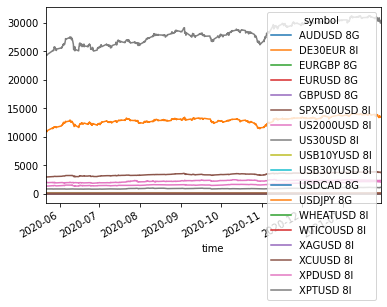

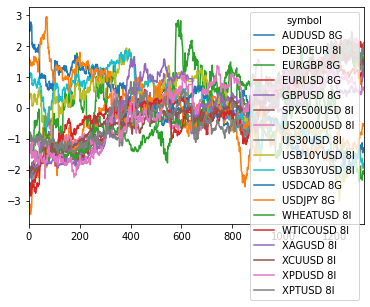

In [11]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
# Get column names first
names = historyShort.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaledShort = scaler.fit_transform(historyShort)
scaledShort = pd.DataFrame(scaledShort, columns=names)



scaledLong = scaler.fit_transform(historyLong)
scaledLong = pd.DataFrame(scaledLong, columns=names)


historyLong.plot()
scaledLong.plot()



In [12]:
#Correlation matrix 
matrixShort = scaledShort.corr()
matrixLong = scaledLong.corr()

## Correlation,  last 3 days

symbol        AUDUSD 8G  DE30EUR 8I  EURGBP 8G  EURUSD 8G  GBPUSD 8G  \
symbol                                                                 
AUDUSD 8G      1.000000    0.820702   0.396840   0.656069   0.161269   
DE30EUR 8I     0.820702    1.000000   0.379762   0.373618  -0.119845   
EURGBP 8G      0.396840    0.379762   1.000000   0.693627  -0.628027   
EURUSD 8G      0.656069    0.373618   0.693627   1.000000   0.124778   
GBPUSD 8G      0.161269   -0.119845  -0.628027   0.124778   1.000000   
SPX500USD 8I   0.817624    0.664581   0.507308   0.552337  -0.099678   
US2000USD 8I   0.716794    0.547641   0.426016   0.427615  -0.125085   
US30USD 8I     0.809152    0.643789   0.477942   0.551327  -0.059983   
USB10YUSD 8I  -0.345376   -0.211226  -0.336599  -0.549407  -0.130265   
USB30YUSD 8I  -0.364387   -0.236657  -0.343142  -0.579090  -0.153227   
USDCAD 8G     -0.936733   -0.807654  -0.430418  -0.622398  -0.078739   
USDJPY 8G     -0.873916   -0.832306  -0.502390  -0.498983   0.15

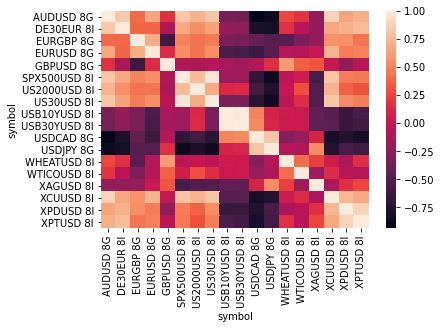

In [13]:
print(matrixShort)
import seaborn as sns

sns.heatmap(matrixShort)

## Correlation,  last 360 days

symbol        AUDUSD 8G  DE30EUR 8I  EURGBP 8G  EURUSD 8G  GBPUSD 8G  \
symbol                                                                 
AUDUSD 8G      1.000000    0.894540  -0.153528   0.941097   0.944367   
DE30EUR 8I     0.894540    1.000000  -0.095434   0.811480   0.803531   
EURGBP 8G     -0.153528   -0.095434   1.000000   0.005882  -0.308211   
EURUSD 8G      0.941097    0.811480   0.005882   1.000000   0.949446   
GBPUSD 8G      0.944367    0.803531  -0.308211   0.949446   1.000000   
SPX500USD 8I   0.946498    0.846496  -0.217550   0.930155   0.953549   
US2000USD 8I   0.921239    0.796836  -0.305240   0.839850   0.895297   
US30USD 8I     0.934282    0.863748  -0.221016   0.905587   0.931132   
USB10YUSD 8I  -0.603009   -0.487748   0.469699  -0.457115  -0.582015   
USB30YUSD 8I  -0.743491   -0.590312   0.320477  -0.660862  -0.729365   
USDCAD 8G     -0.960950   -0.833431   0.164604  -0.948895  -0.954409   
USDJPY 8G     -0.826661   -0.620844  -0.007486  -0.881836  -0.83

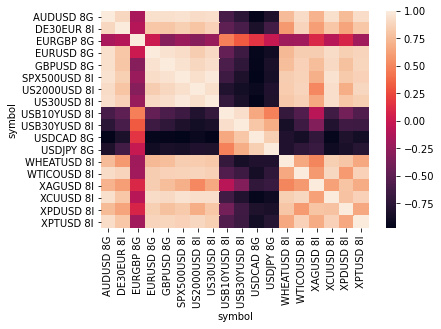

In [14]:
print(matrixLong)

import seaborn as sns

sns.heatmap(matrixLong)


## Correlation of one single asset 

In [15]:
s='XAGUSD'
sdfl = matrixLong[s]
sdfs = matrixShort[s]

cdf = pd.DataFrame([sdfl, sdfs]).transpose()
cdf.columns= ['Long Term Cor', 'Short Term Cor']
cdf['Diff'] = cdf['Long Term Cor'] - cdf['Short Term Cor']
cdf = cdf.sort_values(by='Diff', ascending=False)
print('Correlation ' + s)
print(cdf)

maxRow = cdf[ cdf.Diff == cdf.Diff.max()] 

Correlation XAGUSD
              Long Term Cor  Short Term Cor      Diff
symbol                                               
SPX500USD 8I       0.697330       -0.562318  1.259648
US30USD 8I         0.660534       -0.516346  1.176881
US2000USD 8I       0.513710       -0.517501  1.031211
AUDUSD 8G          0.711817       -0.221233  0.933050
DE30EUR 8I         0.612011       -0.215454  0.827465
EURUSD 8G          0.838799        0.015702  0.823097
WTICOUSD 8I        0.587518       -0.169182  0.756700
XCUUSD 8I          0.629699       -0.114354  0.744053
XPDUSD 8I          0.797082        0.150864  0.646217
GBPUSD 8G          0.765258        0.309831  0.455427
XPTUSD 8I          0.679286        0.251794  0.427492
USB10YUSD 8I      -0.077617       -0.451672  0.374055
EURGBP 8G          0.105468       -0.212560  0.318028
WHEATUSD 8I        0.500836        0.229151  0.271685
USB30YUSD 8I      -0.325739       -0.458888  0.133149
XAGUSD 8I          1.000000        1.000000  0.000000
USDCAD 8G

### Highest convergence

In [16]:

mdf = pd.DataFrame()
for symbol in tickers:
    sdfl = matrixLong[symbol]
    sdfs = matrixShort[symbol]

    cdf = pd.DataFrame([sdfl, sdfs]).transpose()
    cdf.columns= ['Long Term Cor', 'Short Term Cor']
    cdf['Diff'] = cdf['Long Term Cor'] - cdf['Short Term Cor']

    maxRow = cdf[ cdf.Diff == cdf.Diff.max()] 
    dx = pd.DataFrame(maxRow)
    dx['Symbol2'] = symbol
    mdf = mdf.append(dx.iloc[0])

    
mdf = mdf[['Symbol2', 'Long Term Cor', 'Short Term Cor', 'Diff']]
mdf = mdf.sort_values(by='Diff', ascending=False)
print(mdf)
    

                Symbol2  Long Term Cor  Short Term Cor      Diff
XAGUSD 8I     SPX500USD       0.697330       -0.562318  1.259648
SPX500USD 8I     XAGUSD       0.697330       -0.562318  1.259648
XAGUSD 8I       US30USD       0.660534       -0.516346  1.176881
SPX500USD 8I     GBPUSD       0.953549       -0.099678  1.053228
XAGUSD 8I     US2000USD       0.513710       -0.517501  1.031211
GBPUSD 8G        XPDUSD       0.783363       -0.244333  1.027696
GBPUSD 8G        XPTUSD       0.891699       -0.066707  0.958406
XPTUSD 8I      WTICOUSD       0.864032       -0.072968  0.937000
XAGUSD 8I        AUDUSD       0.711817       -0.221233  0.933050
WTICOUSD 8I     DE30EUR       0.880061       -0.052172  0.932233
WTICOUSD 8I      EURUSD       0.844770       -0.081619  0.926389
XPDUSD 8I      WHEATUSD       0.799702       -0.124027  0.923729
GBPUSD 8G        XCUUSD       0.902603        0.007695  0.894908
EURGBP 8G     USB10YUSD       0.469699       -0.336599  0.806298
USB10YUSD 8I     EURGBP  

### Volatility

In [17]:

stdsl = []
stdss = []

for symbol in tickers:
    stdss.append(scaledShort[symbol].std())
    stdsl.append(scaledLong[symbol].std())
print(stdss)
df_vola_long = pd.DataFrame(stdsl, index=tickers, columns=['Vola Long'])
df_vola_short = pd.DataFrame(stdss, index=tickers, columns=['Vola Short']).sort_values(by='Vola Short')
print(df_vola_long)


[1.0095695960312834, 1.0095695960312838, 1.0095695960312836, 1.0095695960312836, 1.0095695960312838, 1.0095695960312838, 1.0095695960312836, 1.0095695960312836, 1.0095695960312836, 1.0095695960312836, 1.0095695960312834, 1.0095695960312838, 1.0095695960312836, 1.0095695960312838, 1.0095695960312836, 1.0095695960312838, 1.0095695960312838, 1.0095695960312838]
           Vola Long
EURUSD       1.00038
USDCAD       1.00038
EURGBP       1.00038
AUDUSD       1.00038
USDJPY       1.00038
GBPUSD       1.00038
DE30EUR      1.00038
SPX500USD    1.00038
US2000USD    1.00038
US30USD      1.00038
USB10YUSD    1.00038
USB30YUSD    1.00038
XAGUSD       1.00038
WHEATUSD     1.00038
WTICOUSD     1.00038
XCUUSD       1.00038
XPDUSD       1.00038
XPTUSD       1.00038


### Calculate Z-Score

In [18]:
qb = QuantBook()
resolution = Resolution.Hour
windowlength = 10
historylength = 24 * 30
symbol = qb.AddForex('EURUSD', resolution).Symbol
h = qb.History([symbol], historylength, resolution).close.unstack(level=0).dropna()

           0
0   0.027233
1   0.006912
2   0.061993
3   0.067772
4   0.011788
5   0.039045
6   0.026694
7   0.005651
8   0.035502
9   0.009912
10  0.023967
11  0.093164
12  0.002019
13  0.006114
14  0.000174
15  0.000408
16  0.030148
17  0.096025
18  0.025690
19  0.142081
20  0.140119
21  0.145626
22  0.015345
23  0.007772


none:107: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


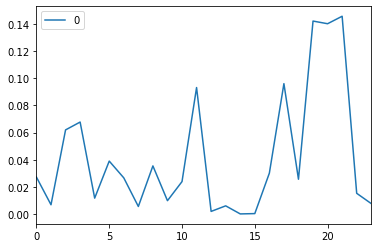

In [19]:
zscore = lambda x: (x[-1] - x.mean()) / x.std()

h['zscore'] = h['EURUSD'].rolling(windowlength).apply(zscore)
results = []
for n in range(0,24):
    results.append( h['zscore'].between_time(str(n) + ':00', str(n) + ':59').mean() ** 2)

df = pd.DataFrame(results)
print(df)
df.plot()